# ABC Product Segmentation and Analysis

### Created by Nurlan Ismayıl

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
import inventorize3 as inv
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
dosya_yolu = r'C:\\Users\\Nurlan\\Downloads\\sales_final_data.csv'
sales = pd.read_csv(dosya_yolu);sales.head()

,order_id,product,product_code,category,address,quantity,price,cost,sales,gross_profit,order_date,gross_margin,period,dow,hour,date,revenue
0,141234,iPhone,5638008983335,smartphones,Germany,1,700.00,231.0000,700.00,469.0000,2023-01-22 21:25:00,0.67,2023-01,Sunday,09 PM,2023-01-22,700.00
1,141235,Lightning Charging Cable,5563319511488,charging cables,İtaly,1,14.95,7.4750,14.95,7.4750,2023-01-28 14:15:00,0.50,2023-01,Saturday,02 PM,2023-01-28,14.95
2,141236,Wired Headphones,2113973395220,headphones,Ispain,2,11.99,5.9950,23.98,11.9900,2023-01-17 13:33:00,0.50,2023-01,Tuesday,01 PM,2023-01-17,23.98
3,141237,27in FHD Monitor,3069156759167,monitors,Irland,1,149.99,97.4935,149.99,52.4965,2023-01-05 20:33:00,0.35,2023-01,Thursday,08 PM,2023-01-05,149.99
4,141238,Wired Headphones,9692680938163,headphones,France,1,11.99,5.9950,11.99,5.9950,2023-01-25 11:59:00,0.50,2023-01,Wednesday,11 AM,2023-01-25,11.99


## Which products generated 80% of gross profit?
ABC product classification is based on the Pareto principle, or 80/20 rule, which states that 80% of sales typically come from 20% of the products. It categorizes the products into three classes - A, B, and C - according to the specific criteria or metric such as sales/revenue or profit. It assigns class A to all products where the cumulative percentage is up to 80%, class B to those where the cumulative percentage contribution is between 80% and 95%, and assigns C to the rest. The result of ABC analysis is the grouping of the products in accordance with their degree of influence on the company's success, in this case, profit. Managing the inventory on the most important 20% of products can lead to better efficiency and profits.

In [3]:
# Prepare data for abc analysis

df_products = sales.groupby(['product']).agg(
                                    num_skus=('product_code', 'nunique'),
                                    quantity=('quantity', 'sum'),
                                    sales=('sales', 'sum'),
                                    profit=('gross_profit', 'sum')).reset_index().sort_values(by='profit', ascending=False)
                        
df_products['profit_cumsum'] = df_products['profit'].cumsum()
df_products['total_profit'] = df_products['profit'].sum()
df_products['profit_running_pct'] = (df_products['profit_cumsum'] / df_products['total_profit'] * 100)
df_products

,product,num_skus,quantity,sales,profit,profit_cumsum,total_profit,profit_running_pct
13,Macbook Pro Laptop,4273,4277,7270900.00,4.871503e+06,4.871503e+06,1.941521e+07,25.091162
18,iPhone,6208,6215,4350500.00,2.914835e+06,7.786338e+06,1.941521e+07,40.104310
14,ThinkPad Laptop,3732,3734,3733962.66,2.501755e+06,1.028809e+07,1.941521e+07,52.989849
9,Google Phone,5027,5033,3019800.00,2.023266e+06,1.231136e+07,1.941521e+07,63.410882
1,27in 4K Gaming Monitor,5625,5639,2199153.61,1.473433e+06,1.378479e+07,1.941521e+07,70.999945
3,34in Ultrawide Monitor,5590,5608,2130983.92,1.427759e+06,1.521255e+07,1.941521e+07,78.353761
8,Flatscreen TV,4340,4356,1306800.00,8.755560e+05,1.608811e+07,1.941521e+07,82.863400
6,Apple Airpods Headphones,14102,14198,2129700.00,7.453950e+05,1.683350e+07,1.941521e+07,86.702631
7,Bose SoundSport Headphones,12036,12157,1215578.43,6.077892e+05,1.744129e+07,1.941521e+07,89.833110
16,Vareebadd Phone,1860,1863,745200.00,4.992840e+05,1.794058e+07,1.941521e+07,92.404722


In [4]:
# Create abc product segmentation

def segment_products(percentage):
    """ Assign an ABC segment to each product based on its ranked percentage profit contribution.
    
    Args:
        percentage: running percentage of profit contribution
    Return:
        ABC product segments
    
    """
    if percentage > 0 and percentage <= 80:
        return 'A'
    elif percentage > 80 and percentage <= 95:
        return 'B'
    else:
        return 'C'

In [5]:
# apply segment_products function on profit_running_pct

df_products['abc_segment_profit'] = df_products['profit_running_pct'].apply(segment_products)
df_products['abc_rank'] = df_products['profit_running_pct'].rank().astype(int)
df_products

,product,num_skus,quantity,sales,profit,profit_cumsum,total_profit,profit_running_pct,abc_segment_profit,abc_rank
13,Macbook Pro Laptop,4273,4277,7270900.00,4.871503e+06,4.871503e+06,1.941521e+07,25.091162,A,1
18,iPhone,6208,6215,4350500.00,2.914835e+06,7.786338e+06,1.941521e+07,40.104310,A,2
14,ThinkPad Laptop,3732,3734,3733962.66,2.501755e+06,1.028809e+07,1.941521e+07,52.989849,A,3
9,Google Phone,5027,5033,3019800.00,2.023266e+06,1.231136e+07,1.941521e+07,63.410882,A,4
1,27in 4K Gaming Monitor,5625,5639,2199153.61,1.473433e+06,1.378479e+07,1.941521e+07,70.999945,A,5
3,34in Ultrawide Monitor,5590,5608,2130983.92,1.427759e+06,1.521255e+07,1.941521e+07,78.353761,A,6
8,Flatscreen TV,4340,4356,1306800.00,8.755560e+05,1.608811e+07,1.941521e+07,82.863400,B,7
6,Apple Airpods Headphones,14102,14198,2129700.00,7.453950e+05,1.683350e+07,1.941521e+07,86.702631,B,8
7,Bose SoundSport Headphones,12036,12157,1215578.43,6.077892e+05,1.744129e+07,1.941521e+07,89.833110,B,9
16,Vareebadd Phone,1860,1863,745200.00,4.992840e+05,1.794058e+07,1.941521e+07,92.404722,B,10


In [6]:
df_products[df_products['abc_segment_profit'] == 'A']

,product,num_skus,quantity,sales,profit,profit_cumsum,total_profit,profit_running_pct,abc_segment_profit,abc_rank
13,Macbook Pro Laptop,4273,4277,7270900.00,4.871503e+06,4.871503e+06,1.941521e+07,25.091162,A,1
18,iPhone,6208,6215,4350500.00,2.914835e+06,7.786338e+06,1.941521e+07,40.104310,A,2
14,ThinkPad Laptop,3732,3734,3733962.66,2.501755e+06,1.028809e+07,1.941521e+07,52.989849,A,3
9,Google Phone,5027,5033,3019800.00,2.023266e+06,1.231136e+07,1.941521e+07,63.410882,A,4
1,27in 4K Gaming Monitor,5625,5639,2199153.61,1.473433e+06,1.378479e+07,1.941521e+07,70.999945,A,5
3,34in Ultrawide Monitor,5590,5608,2130983.92,1.427759e+06,1.521255e+07,1.941521e+07,78.353761,A,6


The following products generated 78.35% of profit:
* Macbook Pro Laptop
* iPhone
* ThinkPad Laptop
* Google Phone
* 27in 4K Gaming Monitor
* 34in Ultrawide Monitor
  
It is important to maintain a sufficient supply of these products and make sure they are the most recent models.

In [8]:
df_products[df_products['abc_segment_profit'] == 'B']

,product,num_skus,quantity,sales,profit,profit_cumsum,total_profit,profit_running_pct,abc_segment_profit,abc_rank
8,Flatscreen TV,4340,4356,1306800.00,875556.000,1.608811e+07,1.941521e+07,82.863400,B,7
6,Apple Airpods Headphones,14102,14198,2129700.00,745395.000,1.683350e+07,1.941521e+07,86.702631,B,8
7,Bose SoundSport Headphones,12036,12157,1215578.43,607789.215,1.744129e+07,1.941521e+07,89.833110,B,9
16,Vareebadd Phone,1860,1863,745200.00,499284.000,1.794058e+07,1.941521e+07,92.404722,B,10
2,27in FHD Monitor,6827,6868,1030131.32,360545.962,1.830112e+07,1.941521e+07,94.261750,B,11


The following products generated 15.93% of profit:
* Flatscreen TV
* Apple Airpods Headphones
* Bose SoundSport Headphones
* Vareebadd Phone

27in FHD Monitor

In [9]:
df_products[df_products['abc_segment_profit'] == 'C']

,product,num_skus,quantity,sales,profit,profit_cumsum,total_profit,profit_running_pct,abc_segment_profit,abc_rank
11,LG Washing Machine,611,611,366600.00,245622.000,1.854674e+07,1.941521e+07,95.526851,C,12
10,LG Dryer,586,586,351600.00,235572.000,1.878232e+07,1.941521e+07,96.740188,C,13
12,Lightning Charging Cable,19679,21110,315594.50,157797.250,1.894011e+07,1.941521e+07,97.552938,C,14
0,20in Monitor,3703,3730,410262.70,143591.945,1.908370e+07,1.941521e+07,98.292523,C,15
15,USB-C Charging Cable,19808,21705,259374.75,129687.375,1.921339e+07,1.941521e+07,98.960491,C,16
17,Wired Headphones,17093,18637,223457.63,111728.815,1.932512e+07,1.941521e+07,99.535961,C,17
4,AA Batteries (4-pack),18681,25062,96238.08,48119.040,1.937324e+07,1.941521e+07,99.783803,C,18
5,AAA Batteries (4-pack),18682,28077,83950.23,41975.115,1.941521e+07,1.941521e+07,100.000000,C,19


The following products generated 5.72% of profit:
* LG Washing Machine
* LG Dryer
* Lightning Charging Cable
* 20in Monitor
* USB-C Charging Cable
* Wired Headphones
* AA Batteries (4-pack)
* AAA Batteries (4-pack)

In [10]:
# Analyze ABC segments

abc_segments = df_products.groupby(['abc_segment_profit']).agg(
                                            num_product = ('product', 'nunique'),
                                            skus = ('num_skus', 'sum'),
                                            quantity = ('quantity', 'sum'),
                                            sales = ('sales', 'sum'),
                                            profit = ('profit', 'sum')).reset_index()

abc_segments['skus_pct'] = round(abc_segments['skus'] / abc_segments['skus'].sum() * 100, 2)
abc_segments['avg_order_value'] = round(abc_segments['sales'] / abc_segments['quantity'], 2)
abc_segments['sales_pct'] = round(abc_segments['sales'] / abc_segments['sales'].sum() * 100, 2)
abc_segments['profit_pct'] = round(abc_segments['profit'] / abc_segments['profit'].sum() * 100, 2)
abc_segments.loc['total']= abc_segments.sum(numeric_only=True, axis=0)
abc_segments[['abc_segment_profit', 'num_product', 'skus', 'skus_pct', 'quantity', 'sales', 'sales_pct', 
              'profit', 'profit_pct', 'avg_order_value']]

,abc_segment_profit,num_product,skus,skus_pct,quantity,sales,sales_pct,profit,profit_pct,avg_order_value
0,A,6.0,30455.0,18.08,30506.0,22705300.19,72.68,1.521255e+07,78.35,744.29
1,B,5.0,39165.0,23.25,39442.0,6427409.75,20.57,3.088570e+06,15.91,162.96
2,C,8.0,98843.0,58.67,119518.0,2107077.89,6.74,1.114094e+06,5.74,17.63
total,NaN,19.0,168463.0,100.00,189466.0,31239787.83,99.99,1.941521e+07,100.00,924.88


* 18% of product SKUs generated 72% of sales and 78% of profit (segment A).
* 82% of product SKUs generated 28% of sales and 22% of profit (segment B and C).

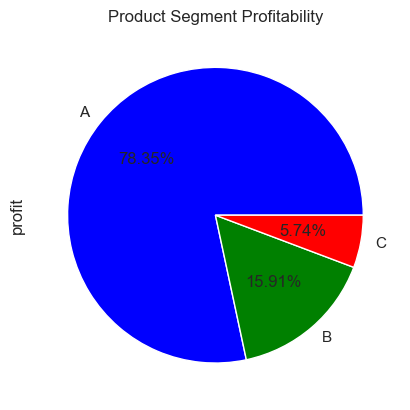

In [11]:
df_products.groupby(['abc_segment_profit'])['profit'].sum().plot(kind='pie', y = 'profit', autopct='%1.2f%%',
                                                                 colors= ['blue', 'green', 'red'],
                                                                 title = 'Product Segment Profitability')
plt.show();

In [16]:
# Merge sales and df_products

sales_abc = sales.merge(df_products, on = 'product', how = 'left')

cols = ['order_date', 'order_id', 'product', 'product_code', 'category', 
        'quantity_x', 'price', 'cost', 'sales_x', 'gross_profit', 'gross_margin', 
        'date', 'period', 'dow', 'hour', 'address', 'abc_segment_profit']

sales_abc = sales_abc[cols]
                                
sales_abc.rename(columns = {'quantity_x': 'quantity',
                           'sales_x': 'sales'}, inplace = True)
sales_abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168463 entries, 0 to 168462
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   order_date          168463 non-null  object 
 1   order_id            168463 non-null  int64  
 2   product             168463 non-null  object 
 3   product_code        168463 non-null  int64  
 4   category            168463 non-null  object 
 5   quantity            168463 non-null  int64  
 6   price               168463 non-null  float64
 7   cost                168463 non-null  float64
 8   sales               168463 non-null  float64
 9   gross_profit        168463 non-null  float64
 10  gross_margin        168463 non-null  float64
 11  date                168463 non-null  object 
 12  period              168463 non-null  object 
 13  dow                 168463 non-null  object 
 14  hour                168463 non-null  object 
 15  address             168463 non-nul

In [19]:
sales_abc.groupby(['abc_segment_profit']).agg(
                                            num_orders = ('order_id', 'nunique'),
                                            num_skus = ('product_code', 'nunique'),
                                            units_sold = ('quantity', 'sum'),
                                            avg_price = ('price', 'mean'),
                                            avg_cost = ('cost', 'mean'),
                                            avg_sales = ('sales', 'mean'),
                                            avg_profit = ('gross_profit', 'mean'),
                                            avg_margin = ('gross_margin', 'mean'))

,num_orders,num_skus,units_sold,avg_price,avg_cost,avg_sales,avg_profit,avg_margin
abc_segment_profit,,,,,,,,
A,30310,30455,30506,744.564128,245.706162,745.536043,499.509149,0.670000
B,38852,39165,39442,163.124253,84.704531,164.111062,78.860467,0.446755
C,97360,98843,119518,20.122203,9.443961,21.317421,11.271345,0.496439


* Products in segment A have an average profit of $499, products in segment C has an average profit of $11. To match a product's profit in segment A, a customer needs to purchase about 45 units from segment C.

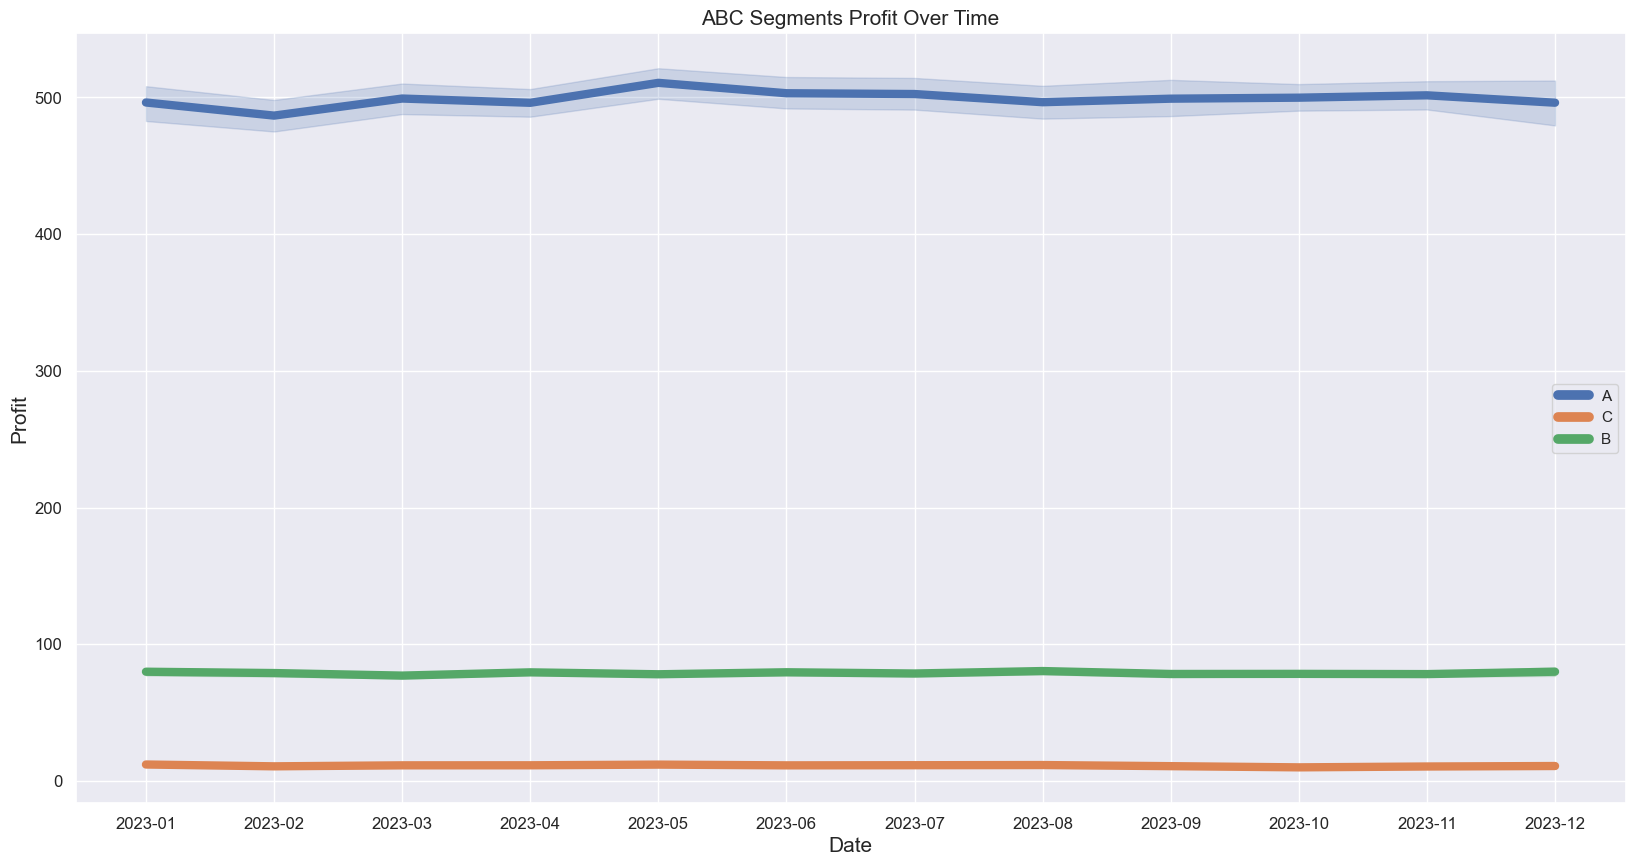

In [20]:
fig = plt.figure(figsize = [20, 10])

ax = sns.lineplot(data=sales_abc, x = sales_abc['period'].astype(str), y = 'gross_profit', hue = 'abc_segment_profit', linewidth = 6)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Profit', fontsize=15)
ax.tick_params(axis = 'both', labelsize = 12)
ax.legend(loc = 2, ncol = 1, framealpha = 1, title = 'Category', fontsize = 15)
plt.title('ABC Segments Profit Over Time', size = 15)

# get the legend object
leg = ax.legend()

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(7)

plt.show()

* Segment A's profitability has consistently outperformed Segment B's and C's profitability.

In [21]:
sales_abc.to_csv(r'C:\\Users\\Nurlan\\Downloads\\abc_data.csv')

## Thank you for reading until the end